# Importing the relevant libraries

In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as SM
from statsmodels.api import Logit
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder , MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier

# Data Preprocessing

### Importing the Database

In [2]:
raw_data = pd.read_csv('ml_datasource.csv')
raw_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [3]:
data = raw_data.copy()

### Removing Outliers

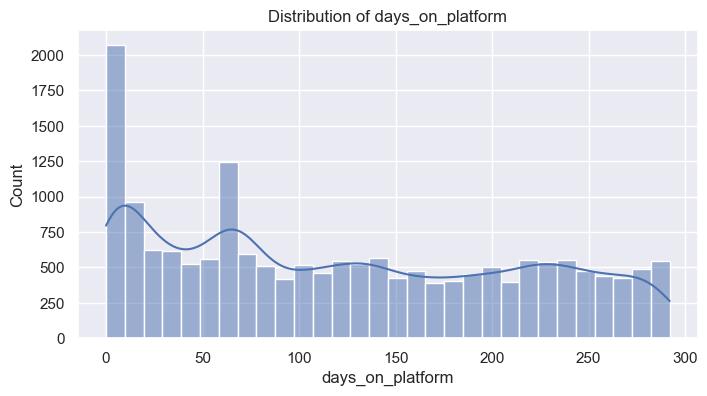

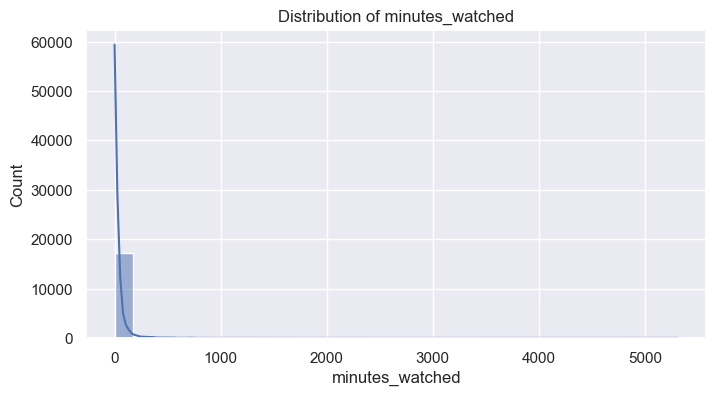

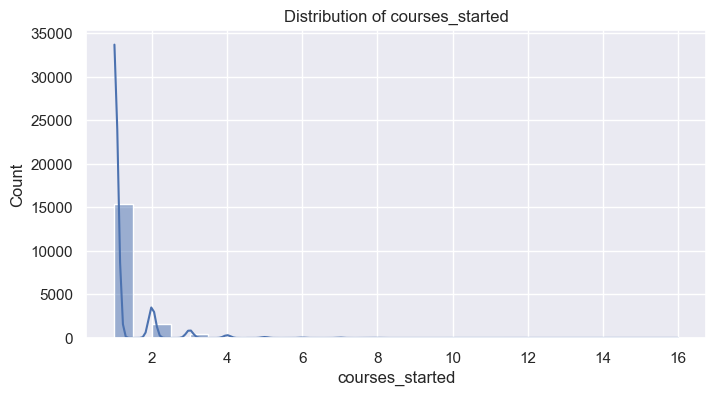

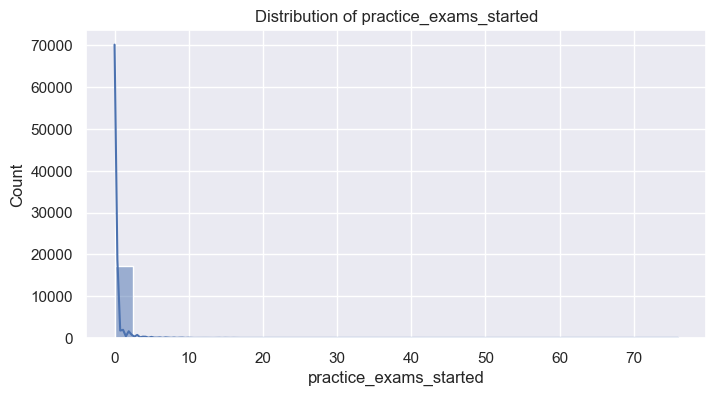

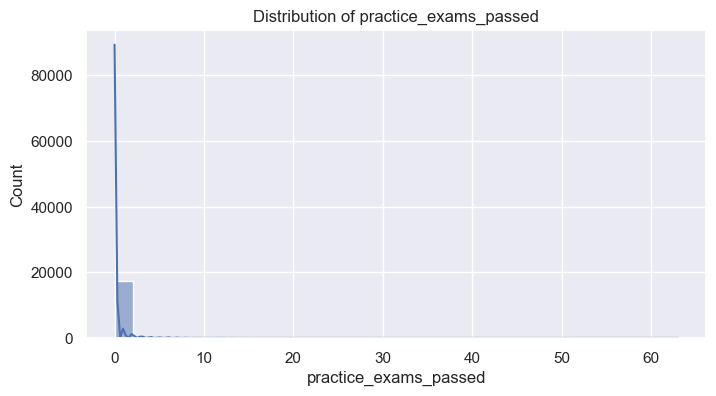

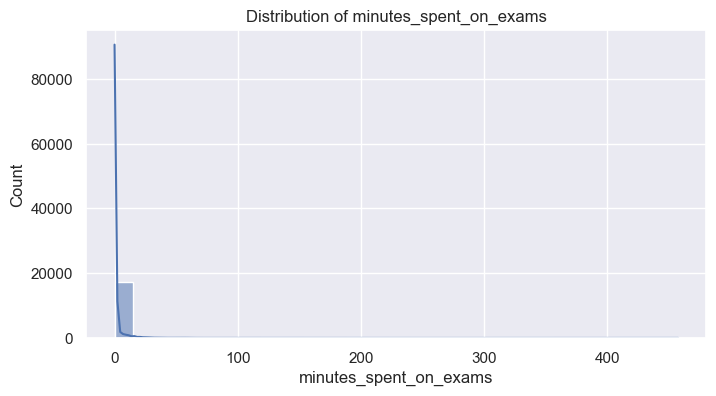

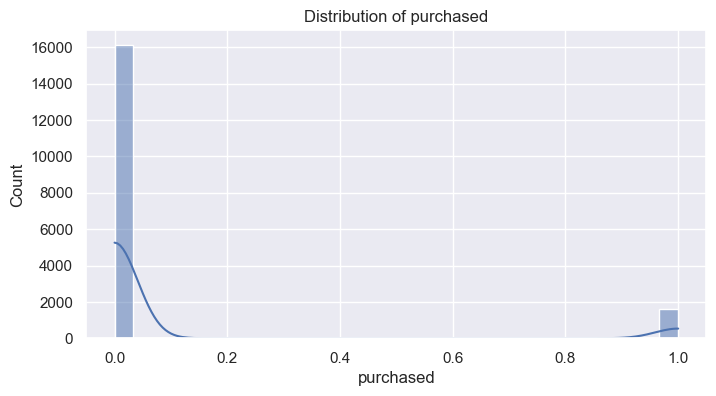

In [4]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

In [5]:
data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


Remove data points from the DataFrame that meet the following criteria:

Minutes watched larger than 1,000
Number of courses surpassing 10
Number of practice exams started higher than 10
Minutes spent on exams going beyond 40 minutes

In [6]:
filtered_data = data[
    (data['minutes_watched']<=1000) &
    (data['courses_started'] <+10) &
    (data['practice_exams_started']<=10) &
    (data['minutes_spent_on_exams'] <=40)
]
filtered_data.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000
mean,123.454102,27.145342,1.177295,0.183195,0.119029,0.778405,0.092137
std,90.773394,56.290650,0.559075,0.817034,0.588701,3.476651,0.289227
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,33.400000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,994.200000,9.000000,10.000000,9.000000,40.000000,1.000000


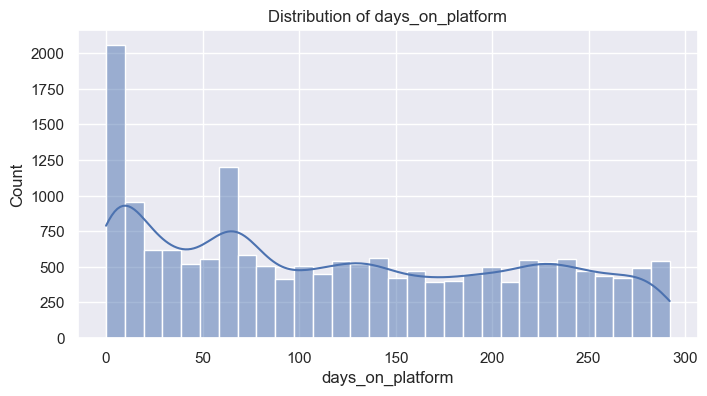

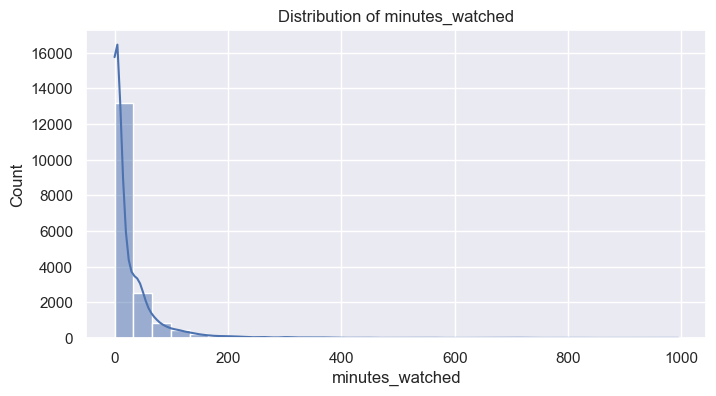

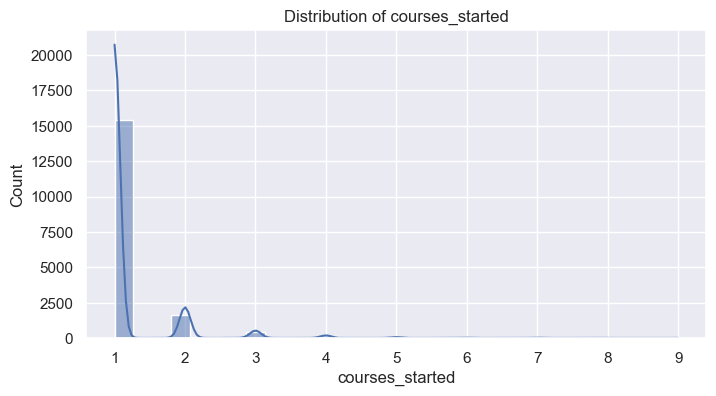

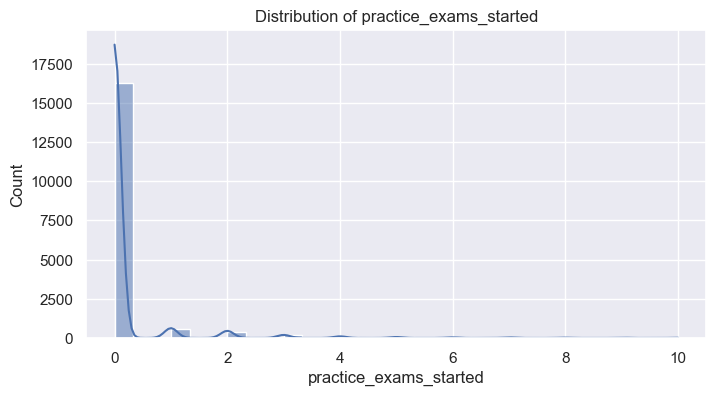

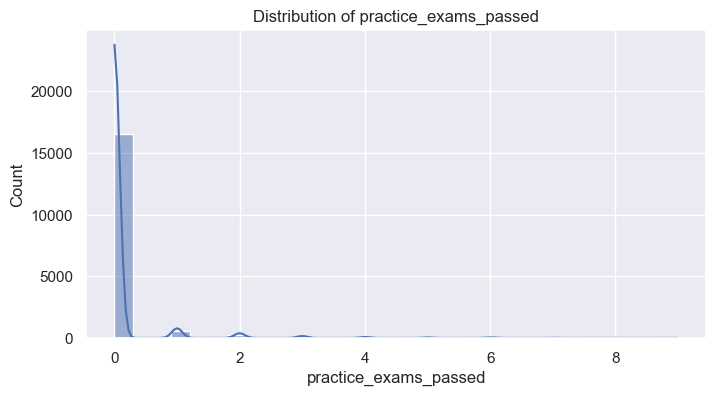

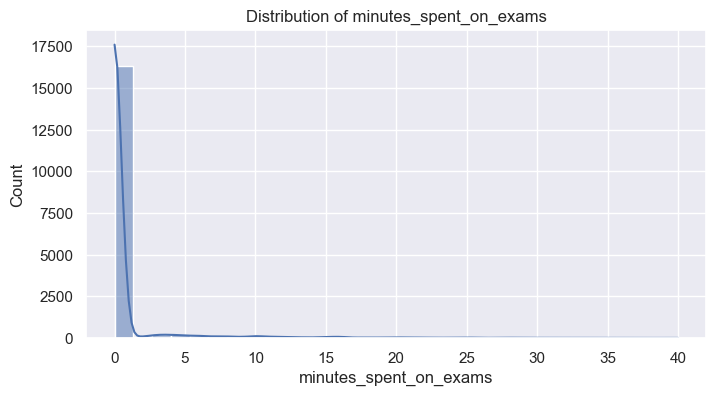

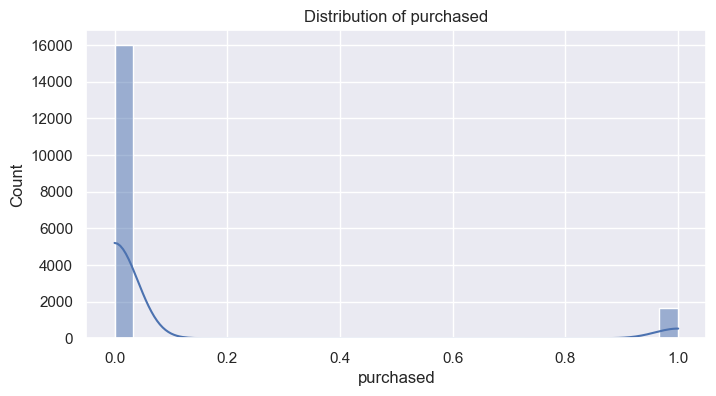

In [7]:
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(filtered_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

### Checking for Multicollinearity

In [8]:
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns
X = filtered_data[numerical_columns]
def check_vif(data):
    vif_data = pd.DataFrame()
    vif_data['features'] = X.columns
    vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

vif_result = check_vif(data)
print(vif_result)
                      

                 features        VIF
0        days_on_platform   2.494163
1         minutes_watched   1.814420
2         courses_started   3.504408
3  practice_exams_started  10.206234
4   practice_exams_passed   7.829732
5  minutes_spent_on_exams   3.355225
6               purchased   1.229006


In [9]:
data_no_mult = filtered_data.drop(['practice_exams_started' ,'practice_exams_passed'] , axis = 1)
data_no_mult

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.00,0
17757,IN,0,0.1,1,0.00,0
17758,CM,0,7.8,1,0.00,0
17759,CA,0,10.4,1,0.00,0


In [10]:
numerical_columns = data_no_mult.select_dtypes(include=['float64', 'int64']).columns
X =data_no_mult[numerical_columns]
def check_vif(data):
    vif_data = pd.DataFrame()
    vif_data['features'] = X.columns
    vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

vif_result = check_vif(data)
print(vif_result)

                 features       VIF
0        days_on_platform  2.492114
1         minutes_watched  1.780969
2         courses_started  3.494122
3  minutes_spent_on_exams  1.228221
4               purchased  1.225146


In [11]:
data_no_mult

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0
...,...,...,...,...,...,...
17756,EG,0,0.8,1,0.00,0
17757,IN,0,0.1,1,0.00,0
17758,CM,0,7.8,1,0.00,0
17759,CA,0,10.4,1,0.00,0


### Dealing with NaN Values

In [12]:
data_no_mult.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [13]:
data_no_mult['student_country'].fillna('NAM' ,inplace=True)


In [14]:
data_no_nulls = data_no_mult
data_no_nulls.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

In [15]:
inputs = data_no_nulls.drop('purchased', axis =1 ) 
inputs = add_constant(inputs)
targets = data_no_nulls['purchased']

In [16]:
inputs.shape , targets.shape

((17626, 6), (17626,))

In [17]:
X_train , X_test , y_train , y_test = train_test_split(inputs , targets , shuffle=True , test_size=0.2 , random_state=365 , stratify=targets)
X_train.shape , y_train.shape

((14100, 6), (14100,))

In [42]:
X_test.shape

(3526, 6)

### Encoding the Data

In [18]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value' , unknown_value=170)
X_train['student_country_enc'] = encoder.fit_transform(X_train['student_country'].to_numpy().reshape(-1, 1) )
X_test['student_country_enc']= encoder.transform(X_test['student_country'].to_numpy().reshape(-1, 1))

In [19]:
X_train.drop('student_country', axis=1 , inplace=True)
X_test.drop('student_country', axis=1 , inplace=True)
X_train.head()

,const,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,student_country_enc
5718,1.0,218,1.6,2,0.0,69.0
3119,1.0,263,75.5,1,0.0,69.0
5440,1.0,222,44.4,1,0.0,84.0
11828,1.0,97,2.6,1,0.0,148.0
8454,1.0,162,1.0,1,0.0,80.0


In [20]:
x_train_array = np.asarray(X_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(X_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

In [47]:
x_test_array.shape

(3526, 6)

# Creating a Logistic Regression Model

In [21]:
log_reg = Logit(y_train_array , x_train_array)

log_reg_results = log_reg.fit()
log_reg_results.summary()

Optimization terminated successfully.
         Current function value: 0.150382
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14094
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.5108
Time:                        13:16:18   Log-Likelihood:                -2120.4
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0423      0.117     -8.891      0.000      -1.272      -0.813
x1            -0.0667      0.002    -30.571      0.000      -0.071      -0.062
x2             0.0129      0.001     18.163      0.000       0.012       0.014
x3             0.1866      0.078      2.379      0.017       0.033       0.340
x4            -0.0542      0.011     -5.116      0.000      -0.075      -0.033
x5             0.0070      0.001      8.622      0.000       0.005       0.009
==============================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [22]:
predictions = log_reg_results.predict(x_test_array).round(3)
predictions

array([0.   , 0.02 , 0.071, ..., 0.016, 0.411, 0.   ])

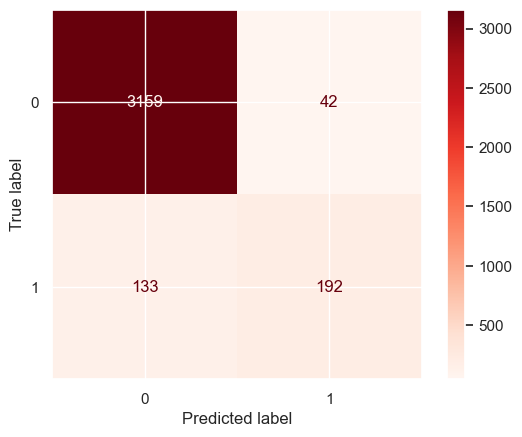

In [23]:
predictions = np.where(predictions >= 0.5, 1, 0)
cm = ConfusionMatrixDisplay.from_predictions( y_test_array , predictions , cmap='Reds')

# Creating a K-Nearest Neighbors Model

In [24]:
knn = KNeighborsClassifier()
parameters_knn = {
    'n_neighbors':list(range(1,50)),
    'weights':['uniform' , 'distance']
}
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=parameters_knn,
                               scoring='accuracy',
                               )

grid_search_knn.fit(x_train_array , y_train_array)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
best_param = grid_search_knn.best_params_
best_score = grid_search_knn.best_score_
best_param , best_score

({'n_neighbors': 10, 'weights': 'distance'}, 0.96)

In [26]:
knn_clf = grid_search_knn.best_estimator_
knn_clf

KNeighborsClassifier(n_neighbors=10, weights='distance')

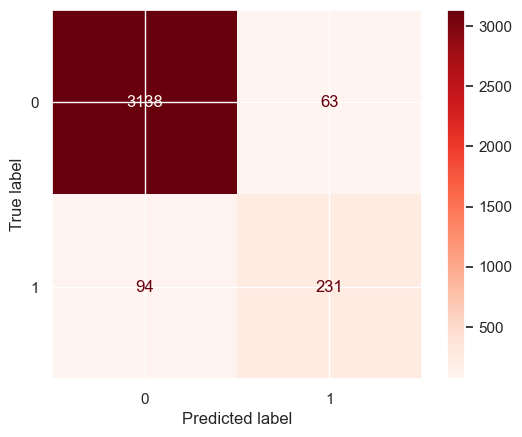

In [27]:
y_test_pred_knn = knn_clf.predict(x_test_array)
cm = ConfusionMatrixDisplay.from_predictions(y_test_array , y_test_pred_knn , cmap='Reds')

In [28]:
class_names =['class0' , 'class1']
report= classification_report(y_test_array , y_test_pred_knn , target_names=class_names , output_dict=True)
report = pd.DataFrame(report).transpose()
report


,precision,recall,f1-score,support
class0,0.970916,0.980319,0.975595,3201.000000
class1,0.785714,0.710769,0.746365,325.000000
accuracy,0.955474,0.955474,0.955474,0.955474
macro avg,0.878315,0.845544,0.860980,3526.000000
weighted avg,0.953845,0.955474,0.954466,3526.000000


# Creating a Support Vector Machines Model

In [29]:
scaler = MinMaxScaler(feature_range=(-1,1))
x_train_array_scaled = scaler.fit_transform(x_train_array)
x_test_array_scaled = scaler.transform(x_test_array)

In [44]:
svc = SVC()
svc_parameter={
    'kernel':['linear' ,'poly' , 'rbf'],
    'C':[2,4,5,6 ,7 ,8 ,9],
    'gamma':['scale' , 'auto']
}

grid_search_svc = GridSearchCV(
    estimator=svc,
    param_grid=svc_parameter,
    scoring='accuracy'
)

grid_search_svc.fit(x_train_array_scaled , y_train_array )
best_param_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
best_param_svc , best_score_svc


({'C': 8, 'gamma': 'scale', 'kernel': 'poly'}, 0.9602127659574468)

In [45]:
svc_clf = grid_search_svc.best_estimator_
svc_clf

SVC(C=8, kernel='poly')

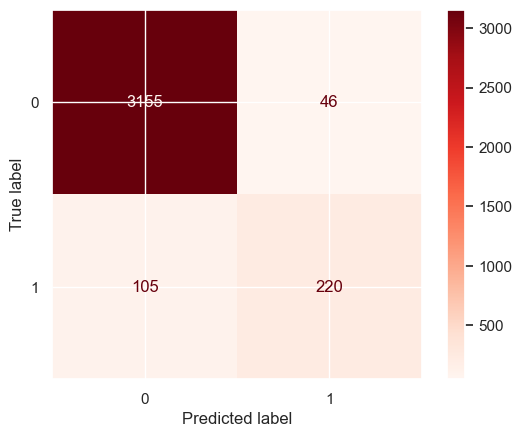

In [46]:
y_test_pred_svc = svc_clf.predict(x_test_array_scaled)
cm_svc = ConfusionMatrixDisplay.from_predictions(y_test_array , y_test_pred_svc , cmap='Reds')

In [33]:
class_names_svc =['class0' , 'class1']
report_svc= classification_report(y_test_array , y_test_pred_svc , target_names=class_names_svc , output_dict=True)
report_svc = pd.DataFrame(report_svc).transpose()
report_svc

,precision,recall,f1-score,support
class0,0.967475,0.985005,0.976161,3201.000000
class1,0.820225,0.673846,0.739865,325.000000
accuracy,0.956324,0.956324,0.956324,0.956324
macro avg,0.893850,0.829425,0.858013,3526.000000
weighted avg,0.953902,0.956324,0.954381,3526.000000


# Creating a Decision Trees Model

In [34]:
DT_classifier = DecisionTreeClassifier()
DT_param ={'ccp_alpha' : [0,0.001,0.002,0.003,0.004,0.005]}
grid_search_DT = GridSearchCV(
    estimator=DT_classifier,
    param_grid=DT_param,
    scoring='accuracy'
)
grid_search_DT.fit(x_train_array , y_train_array)
best_estimator_DT = grid_search_DT.best_estimator_ 
best_estimator_DT

DecisionTreeClassifier(ccp_alpha=0.001)

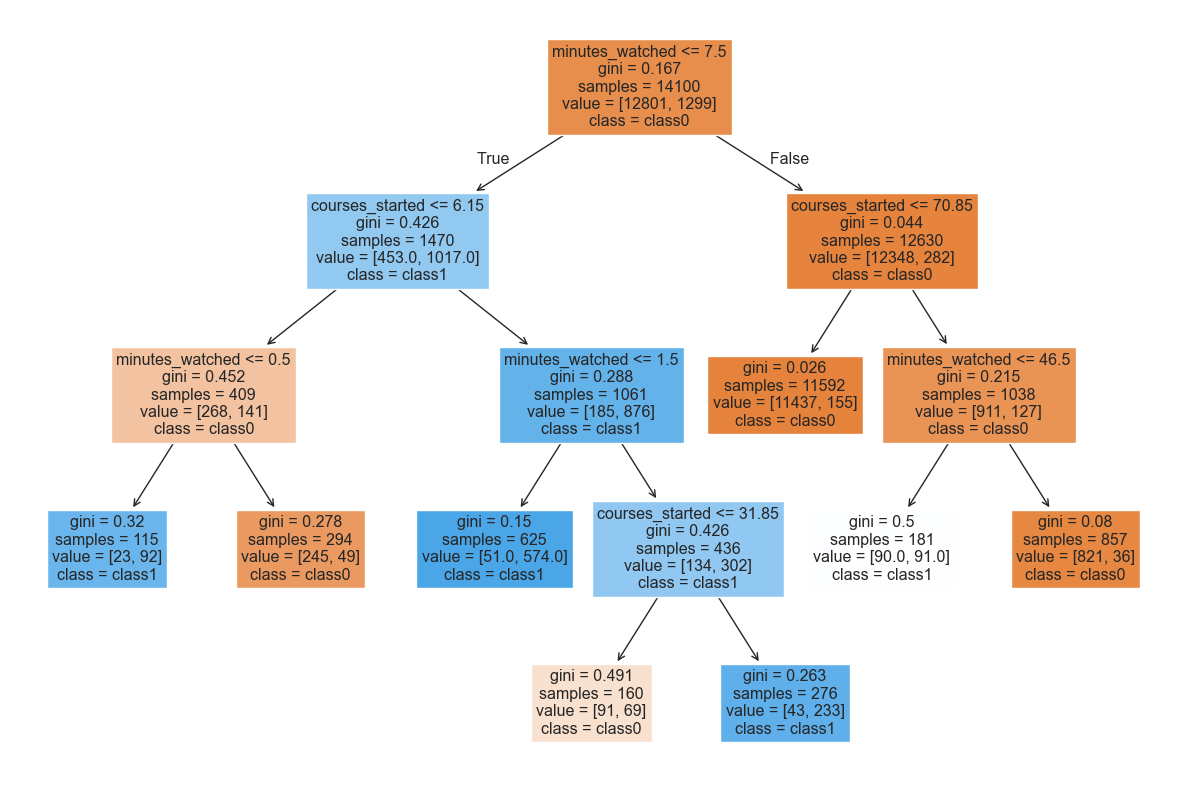

In [35]:
featuer_names = ['days_on_platform','minutes_watched','courses_started','minutes_spent_on_exams','student_country_enc']
class_names_dt =['class0' , 'class1'] 
plt.figure(figsize=(15,10))
plot_tree(best_estimator_DT , filled=True , feature_names=featuer_names , class_names=class_names_dt)
plt.show()


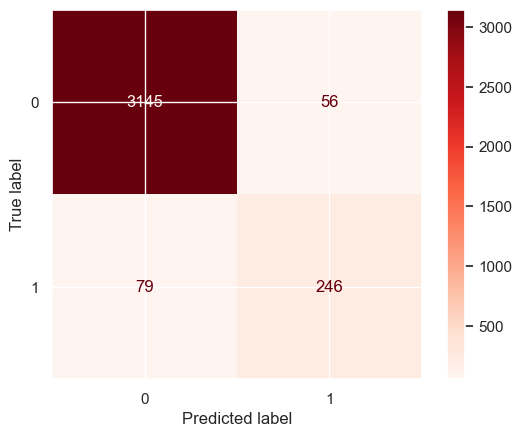

In [36]:
y_pred_DT = best_estimator_DT.predict(x_test_array)
cm_DT = ConfusionMatrixDisplay.from_predictions(y_test_array , y_pred_DT , cmap='Reds')

In [37]:
report_dt= classification_report(y_test_array , y_pred_DT , target_names=class_names_dt , output_dict=True)
report_dt = pd.DataFrame(report_dt).transpose()
report_dt

,precision,recall,f1-score,support
class0,0.975496,0.982505,0.978988,3201.000000
class1,0.814570,0.756923,0.784689,325.000000
accuracy,0.961713,0.961713,0.961713,0.961713
macro avg,0.895033,0.869714,0.881839,3526.000000
weighted avg,0.960663,0.961713,0.961079,3526.000000


# Creating a Random Forests Model

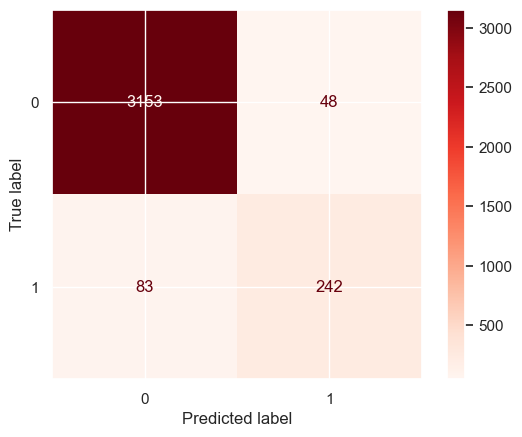

In [39]:
RF_classifier = RandomForestClassifier(ccp_alpha=0.001 , random_state=365)
RF_classifier = RF_classifier.fit(x_train_array , y_train_array)
y_pred_RF = RF_classifier.predict(x_test_array)
cm_RF = ConfusionMatrixDisplay.from_predictions(y_test_array , y_pred_RF , cmap='Reds')

In [40]:
report_rf= classification_report(y_test_array , y_pred_RF , target_names=class_names , output_dict=True)
report_rf = pd.DataFrame(report_rf).transpose()
report_rf

,precision,recall,f1-score,support
class0,0.974351,0.985005,0.979649,3201.000000
class1,0.834483,0.744615,0.786992,325.000000
accuracy,0.962847,0.962847,0.962847,0.962847
macro avg,0.904417,0.864810,0.883320,3526.000000
weighted avg,0.961459,0.962847,0.961891,3526.000000
